In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Checking missing values

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

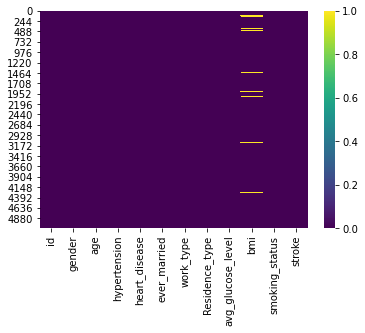

In [7]:
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
df['bmi'].isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

## We've 201 missing values for BMI column, Trying to check the average BMI of both men and women so that we can fill the missing value accordingly

In [9]:
df.loc[df['gender'].isin(['Male']), 'bmi'].mean()

28.647936350074616

In [10]:
df.loc[df['gender'].isin(['Female']), 'bmi'].mean()

29.065757680359038

## Difference is almost nill so it's better to take the overall average BMI of both men and women

In [11]:
avg_bmi = df['bmi'].mean()

In [12]:
avg_bmi

28.893236911794673

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Not much difference between average BMI of men and women so filling all the missing values with average BMI of both men and women instead

In [14]:
df['bmi'] = df['bmi'].fillna(avg_bmi)

In [15]:
df['bmi'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [16]:
df.isnull().values.any()

False

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:>

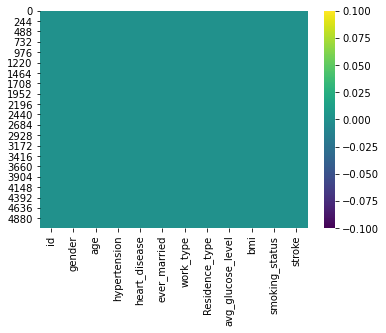

In [18]:
sns.heatmap(df.isnull(),cmap='viridis')

## Seperating people with stroke status (0 & 1)

In [19]:
stroke_true = df[df['stroke']==1]
stroke_false = df[df['stroke']==0]

## - As we seperated the stroke status (0 and 1) We found that people who had stroke are relatively old peoples compared to the people who never had stroke, Also people who had stroke generally had high glucose level and body mass index

In [20]:
stroke_true.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.217789,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,5.825589,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,28.893237,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [21]:
stroke_false.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825388,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.776203,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.600000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.300000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,32.800000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


## Here we can see that people with private jobs are most affected with stroke in comparison with other type of jobs

<AxesSubplot:xlabel='work_type', ylabel='count'>

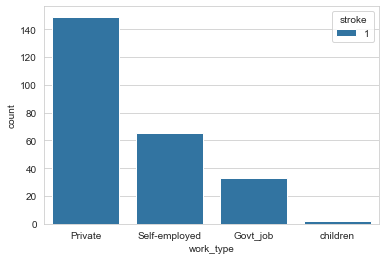

In [22]:
sns.set_style('whitegrid')
sns.countplot(x="work_type", hue="stroke" ,  data=stroke_true)

## People from rural areas are least affected with stroke

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

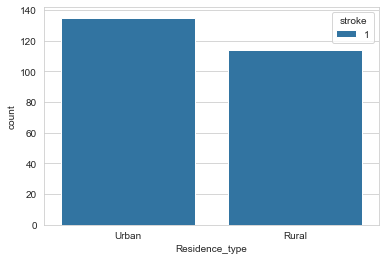

In [23]:
sns.set_style('whitegrid')
sns.countplot(x="Residence_type", hue="stroke" ,  data=stroke_true)

## Surprisingly people who already have hyptertension suffered the stroke less as compared to the people who never had hypertension 

<AxesSubplot:xlabel='hypertension', ylabel='count'>

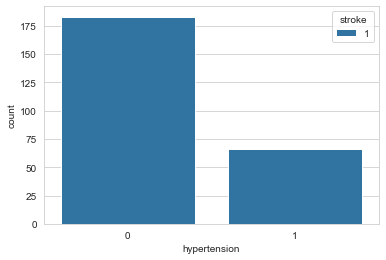

In [24]:
sns.set_style('whitegrid')
sns.countplot(x="hypertension", hue="stroke" ,  data=stroke_true)

## Similarly people who already have heart disease has suffered less stroke

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

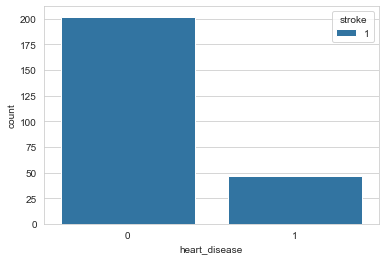

In [25]:
sns.set_style('whitegrid')
sns.countplot(x="heart_disease", hue="stroke" ,  data=stroke_true)

## Susprisingly married people are the one who suffered mostly with stroke

<AxesSubplot:xlabel='ever_married', ylabel='count'>

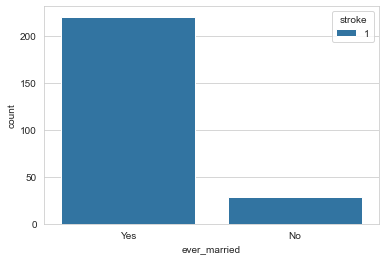

In [26]:
sns.set_style('whitegrid')
sns.countplot(x="ever_married", hue="stroke" ,  data=stroke_true)

## Encoding categorical features using LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [28]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Removing 'ID' column as it has no relevance on our model

In [29]:
df.drop('id', axis = 1 , inplace=True)

In [30]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [31]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## Splitting data into training and testing

In [33]:
from sklearn. model_selection import train_test_split

In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Importing Decision Tree Regressor 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
x_test_prediction = model.predict(X_test)

In [40]:
accuracy = accuracy_score(x_test_prediction,Y_test)

In [41]:
print(accuracy)

0.9168297455968689


## Using the model to predict the value (0 - No Stroke , 1 - Stroke)
 
[Gender , Age , Hyptertension , Heart_disease , Ever_married , Work_type , Residence_type , Avg_glucode_level , BMI , Smoking_status]

In [42]:
features = np.array([[1,30,1,1,1,2,1,240,40,1]])
model.predict(features) 

array([0], dtype=int64)

In [43]:
model.predict(features) 

array([0], dtype=int64)